In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
from scipy.fftpack import fft
from scipy.signal import butter, lfilter, freqz
from scipy import signal
from scipy.signal import savgol_filter
from scipy import interpolate

---
An Introduction to Digital Signal Processing 
=====
***

In [2]:
x_plot = np.linspace(0, 1, 100)
y = np.sin(x_plot * 2.0 * np.pi)

(-1.02, 1.02)

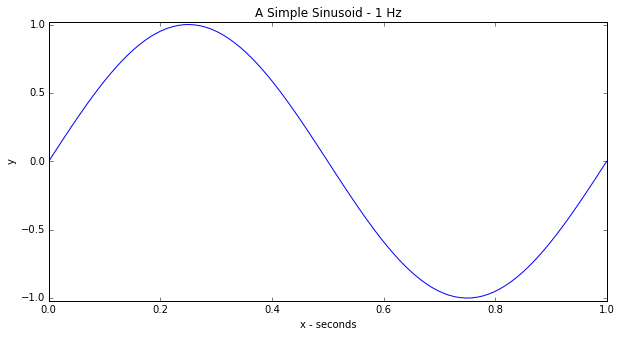

In [3]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot(111)
ax.plot(x_plot, y)
ax.set_title("A Simple Sinusoid - 1 Hz")
ax.set_xlabel("x - seconds")
ax.set_ylabel("y")
ax.set_ylim(-1.02, 1.02)

###A single frequency sinusoid - time domain, frequency domain

(0, 5.0)

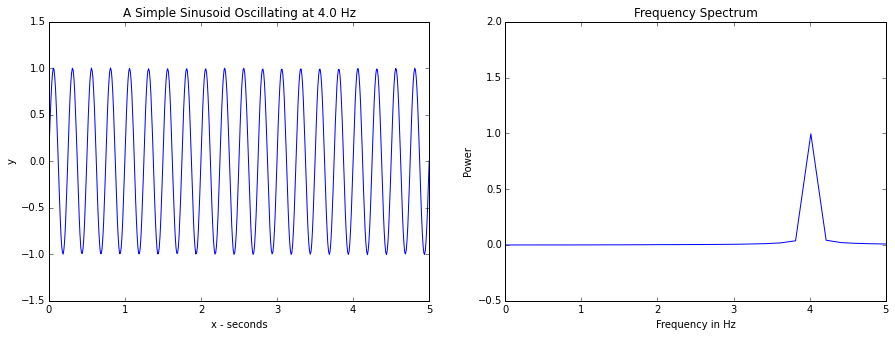

In [7]:
#Generate a signal oscillation at 5 Hz
F = 4.0

no_of_secs = 5

Fs = 1./100.0
N = no_of_secs * 1.0/Fs

x = np.linspace(0, N*Fs, N)
y = np.sin(x * F * 2.0 * np.pi) + (np.random.rand(N)-0.5)*0.01

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*Fs), N/2)

fig = plt.figure(figsize = (15,5))

ax = plt.subplot(121)
ax.plot(x, y)
title = "A Simple Sinusoid Oscillating at {:2.1f} Hz".format(F)
ax.set_title(title)
ax.set_xlabel("x - seconds")
ax.set_ylabel("y")


ax = plt.subplot(122)
ax.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
ax.set_title("Frequency Spectrum")
ax.set_xlabel("Frequency in Hz")
ax.set_ylabel("Power")
ax.set_ylim(-0.5, 2)
ax.set_xlim(0, F + 1.0)

###A multiple frequency sinusoid - time domain, frequency domain

(0, 11.0)

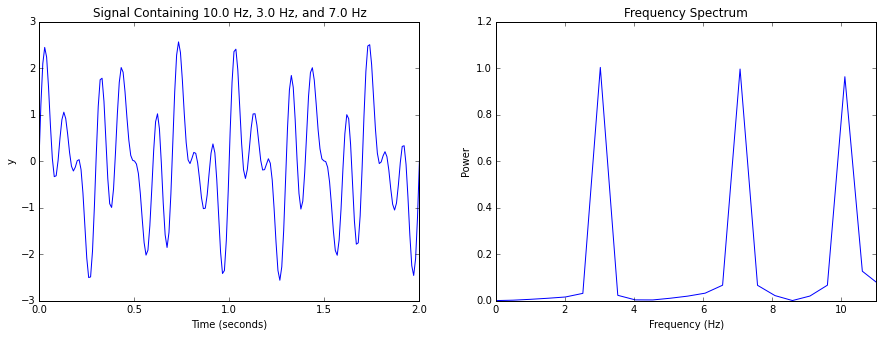

In [8]:
F = 10.0
F1 = 3.0
F2 = 7.0

no_of_secs = 2
Fs = 1./100.0

N = no_of_secs * 1.0/Fs

x = np.linspace(0, N*Fs, N)
y = np.sin(x * F * 2.0 * np.pi) + (np.random.rand(N)-0.5)*0.01
y1 = np.sin(x * F1 * 2.0 * np.pi) + (np.random.rand(N)-0.5)*0.01
y2 = np.sin(x * F2 * 2.0 * np.pi) + (np.random.rand(N)-0.5)*0.01
y += y1 + y2

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*Fs), N/2)

fig = plt.figure(figsize = (15,5))
ax = plt.subplot(121)
ax.plot(x, y)
title = "Signal Containing {0:} Hz, {1:} Hz, and {2:} Hz".format(F, F1, F2)
ax.set_title(title)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("y")

ax = plt.subplot(122)
ax.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
title = "Frequency Spectrum"
ax.set_title(title)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power")
ax.set_xlim(0, F + 1.0)

---
Bio-electric Signal Processing - EEG
=====
***

In [9]:
eeg_signal = np.load("../Datasets/sample2_EEG.npy")

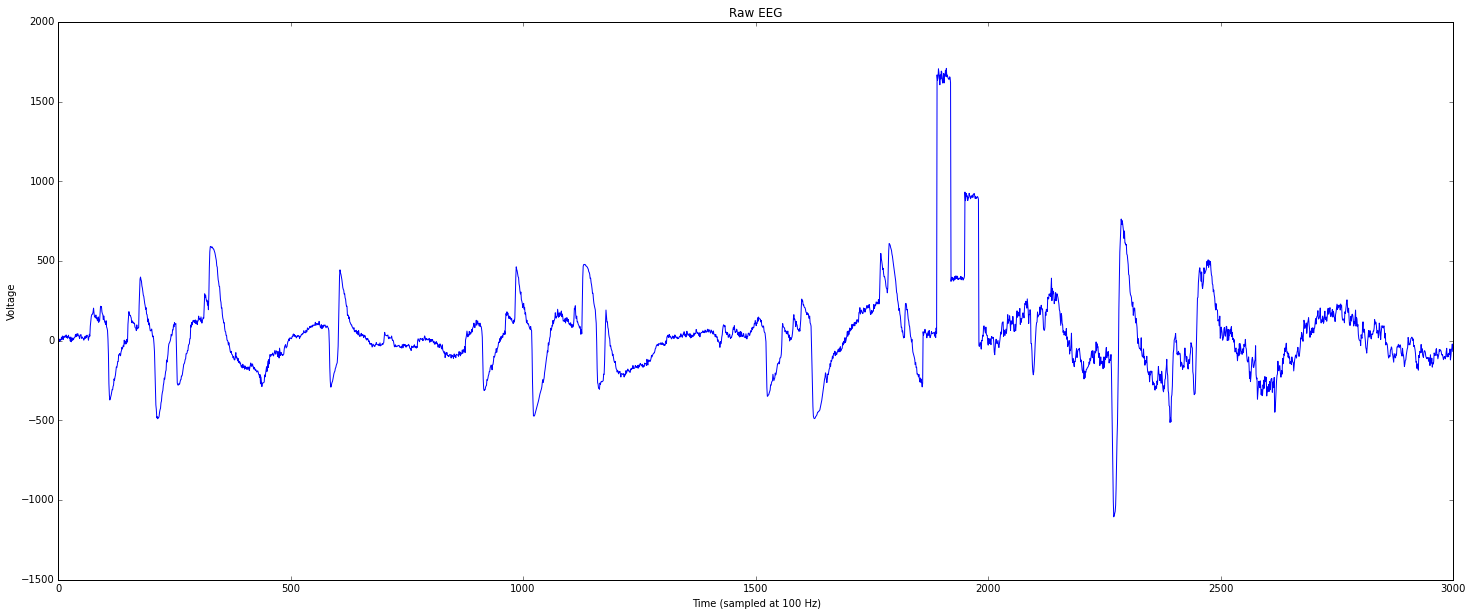

In [10]:
fig = plt.figure(figsize = (25, 10))
ax = plt.subplot(111)
ax.plot(eeg_signal[0:3000])
ax.set_title("Raw EEG")
ax.set_xlabel("Time (sampled at 100 Hz)")
ax.set_ylabel("Voltage")

In [39]:
def plot_signal_and_spectrum(fig, number_of_seconds, window):
    '''This function provides an interactive plot of the signal and the frequency spectrum'''
    
    fig.clf()
    no_of_secs = number_of_seconds
    Fs = 1./100.0

    N = no_of_secs * 1.0/Fs

    x = np.linspace(0, N*Fs, N)
    y = window

    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*Fs), N/2)

    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.plot(x, y)
    title = "EEG Signal"
    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("y")

    ax1.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
    title = "Frequency Spectrum"
    ax1.set_title(title)
    ax1.set_xlabel("Frequency (Hz)")
    ax1.set_ylabel("Power")
    ax1.set_xlim(0, 30.0)
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [40]:
def moving_average(x, N):
    '''Performs a simple moving average'''
    
    sp = np.zeros(len(x)-N)
    for i in range(N, len(x)):
        sum = 0.0;
        for j in range(N):
            sum += x[i-j]
        sp[i-N] = sum/(float(N))
    return sp

def subtract_off_mean(x):
    '''Subtracts off the mean'''
    
    return x-x.mean()

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


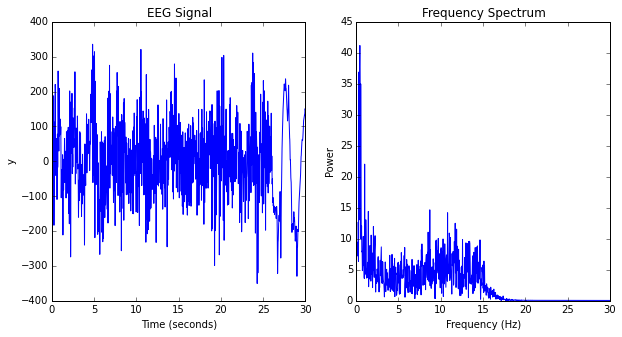

KeyboardInterrupt: 

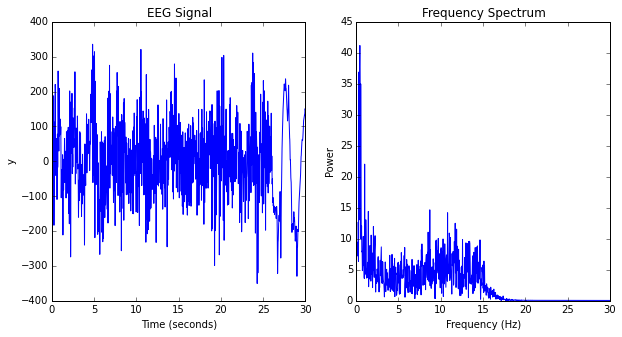

In [41]:
end_of_signal = len(eeg_signal)
n = 0
window_length = 30
sampling_frequency = 100
fig = plt.figure(figsize = (10,5))

count = 0

while True:
#    plt.cla()

    if n+(window_length*sampling_frequency) > end_of_signal:
        print "All Done"
        break
    window = eeg_signal[n: n+(window_length*sampling_frequency)]
    window = subtract_off_mean(window)
    n_window = butter_lowpass_filter(window, 15.0, 100.0, order=15)
                           
    plot_signal_and_spectrum(fig, window_length, n_window)
    
    raw_input('>>>')
    
    if count == 500:
        break;
        
    count += 1
    n += window_length*sampling_frequency
    print n
    


#An Fourier Transform Tutorial

http://docs.scipy.org/doc/scipy-dev/reference/tutorial/fftpack.html